<a href="https://colab.research.google.com/github/MaykaS/Machine-Learning-A-Z-in-python-UDEMI-/blob/part4---Clustering/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values #only two columns
#identify the patterns - coustomerID, Age are unrelevant 

## Using the elbow method to find the optimal number of clusters

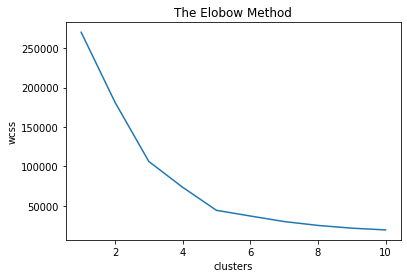

In [4]:
from sklearn.cluster import KMeans
#create a list to wcss
wcss = []
#creating 10 Kmean objects
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  #tip - to avoid random init trap - kmeans++ method
  #the random_state num is not important - can choose any num
  kmeans.fit(X)
  #adding wcss val computed for i clusters
  #sum of squ distances between cluster and center 
  wcss.append(kmeans.inertia_) 
#plot the graph
plt.plot(range(1,11), wcss)
plt.title('The Elobow Method')
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()

## Training the K-Means model on the dataset

In [6]:
#optimal num = 5 (according to the graph above)
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
#build the dependet var (1,2,3,4,5) = the predict returns that
print(y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


## Visualising the clusters

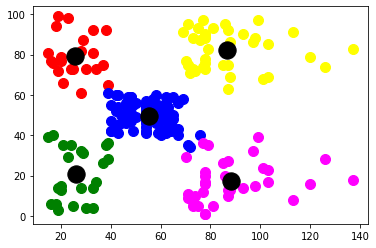

In [10]:
#scatter for every clustter
#rows of customers that belong to that cluster
plt.scatter(X[y_kmeans ==0, 0], X[y_kmeans ==0, 1], s = 100, c = 'red', label='cluster1' )
plt.scatter(X[y_kmeans ==1, 0], X[y_kmeans ==1, 1], s = 100, c = 'blue', label='cluster2' )
plt.scatter(X[y_kmeans ==2, 0], X[y_kmeans ==2, 1], s = 100, c = 'yellow', label='cluster3' )
plt.scatter(X[y_kmeans ==3, 0], X[y_kmeans ==3, 1], s = 100, c = 'green', label='cluster4' )
plt.scatter(X[y_kmeans ==4, 0], X[y_kmeans ==4, 1], s = 100, c = 'magenta', label='cluster5' )
#plot the center of each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, color ='black', label = 'Centroids')